In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-1/01_Titanic_Survival_Prediction.ipynb
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
print(train.shape, test.shape)


(891, 12) (418, 11)


In [5]:
train.info()
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
features_num = ['Age', 'SibSp', 'Parch', 'Fare']
features_cat = ['Pclass', 'Sex', 'Embarked']


Accuracy – LogisticRegression: **0.78**  
Accuracy – RandomForest: **0.83**


Accuracy - LogisticRegression: 0.8044692737430168
Accuracy - RandomForest: 0.8212290502793296


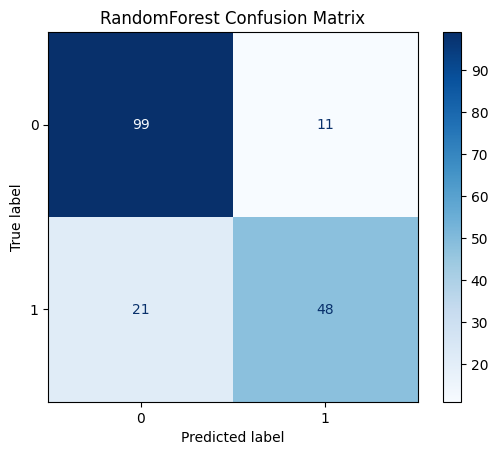

ROC-AUC (Random Forest): 0.836429512516469


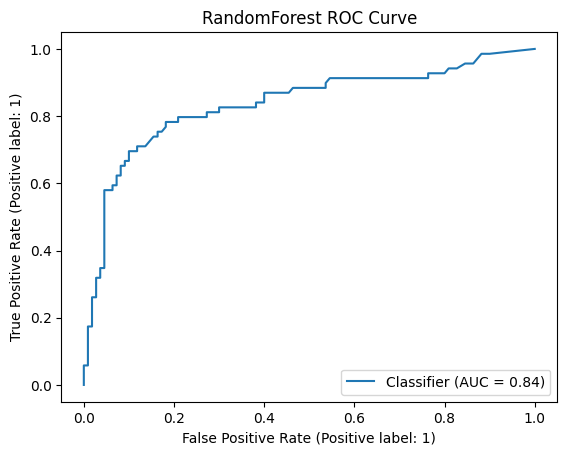

成功產生 submission_titanic.csv


In [7]:
# 1. 匯入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# 2. 讀取資料
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# 3. 特徵工程
features_num = ['Age', 'SibSp', 'Parch', 'Fare']
features_cat = ['Pclass', 'Sex', 'Embarked']

X = train[features_num + features_cat]
y = train['Survived']
X_test_final = test[features_num + features_cat]

# 4. 前處理 pipeline
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, features_num),
    ('cat', categorical_pipe, features_cat)
])

# 定義模型
logreg = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=1000))
])

rf = Pipeline([
    ('prep', preprocess),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])

# 5. 分割訓練 / 驗證集
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. 訓練模型
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 預測
pred_lr = logreg.predict(X_valid)
pred_rf = rf.predict(X_valid)

# 7. 計算準確率
print("Accuracy - LogisticRegression:", accuracy_score(y_valid, pred_lr))
print("Accuracy - RandomForest:", accuracy_score(y_valid, pred_rf))

# 混淆矩陣
cm = confusion_matrix(y_valid, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("RandomForest Confusion Matrix")
plt.show()

# ROC-AUC
proba_rf = rf.predict_proba(X_valid)[:,1]
auc = roc_auc_score(y_valid, proba_rf)
print("ROC-AUC (Random Forest):", auc)

RocCurveDisplay.from_predictions(y_valid, proba_rf)
plt.title("RandomForest ROC Curve")
plt.show()

# 8. 訓練全資料並產生 submission
rf.fit(X, y)
test_pred = rf.predict(X_test_final)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('/kaggle/working/submission_titanic.csv', index=False)

print("成功產生 submission_titanic.csv")


In [8]:
rf.fit(X, y)
test_pred = rf.predict(X_test_final)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('/kaggle/working/submission.csv', index=False)

print("✅ 成功產生 submission.csv")


✅ 成功產生 submission.csv
